In [18]:
from keras.preprocessing.image import ImageDataGenerator
import os

# Path to the dataset folder
dataset_path = './dataset'

# Image size and batch size configuration
image_size = (128, 128)
batch_size = 32

# Creating an ImageDataGenerator object with a validation split
datagen = ImageDataGenerator(rescale=1./255)  # 20% of the data will be used as validation

# Setting up the training data generator
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Setting up the validation data generator
test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Print the class labels for both generators
print(train_generator.class_indices)
print(test_generator.class_indices)

Found 2720 images belonging to 2 classes.
Found 681 images belonging to 2 classes.
{'edible': 0, 'poisonous': 1}
{'edible': 0, 'poisonous': 1}


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with softmax activation for classification
model.add(Dense(2, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10


2024-05-24 18:20:50.287315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


85/85 [==============================] - 11s 114ms/step - loss: 0.7295 - accuracy: 0.6412
Epoch 2/10
85/85 [==============================] - 8s 90ms/step - loss: 0.6323 - accuracy: 0.6529
Epoch 3/10
85/85 [==============================] - 8s 93ms/step - loss: 0.5791 - accuracy: 0.6923
Epoch 4/10
85/85 [==============================] - 10s 103ms/step - loss: 0.4638 - accuracy: 0.7702
Epoch 5/10
85/85 [==============================] - 8s 92ms/step - loss: 0.3176 - accuracy: 0.8529
Epoch 6/10
85/85 [==============================] - 8s 92ms/step - loss: 0.2052 - accuracy: 0.9158
Epoch 7/10
85/85 [==============================] - 8s 94ms/step - loss: 0.1073 - accuracy: 0.9581
Epoch 8/10
85/85 [==============================] - 8s 94ms/step - loss: 0.0794 - accuracy: 0.9732
Epoch 9/10
85/85 [==============================] - 8s 94ms/step - loss: 0.0984 - accuracy: 0.9684
Epoch 10/10
85/85 [==============================] - 8s 97ms/step - loss: 0.0391 - accuracy: 0.9904


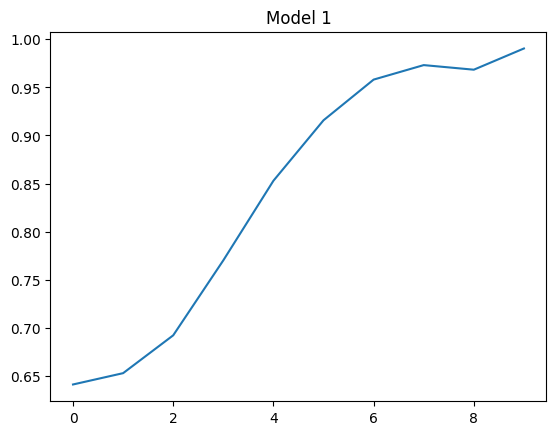

In [22]:
import matplotlib.pyplot as plt

plt.title("Model 1")
plt.plot(history.history['accuracy'],label='accuracy')

In [24]:
validation_results = model.evaluate_generator(test_generator)
print(validation_results)

/tmp/ipykernel_69282/1891459552.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_results = model.evaluate_generator(test_generator)
2024-05-24 18:22:26.765568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[1.997779130935669, 0.6270191073417664]


In [25]:
# Specify the file path to save the model
model_path = 'cnn.h5'

# Save the model
model.save(model_path)


In [17]:
from keras.models import load_model

model_path = 'cnn.h5'
model = load_model(model_path)

predictions = model.predict(validation_generator)



 1/17 [>.............................] - ETA: 3s

2024-05-24 18:18:06.648350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


17/17 [==============================] - 1s 53ms/step
